In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU

2025-07-09 04:52:38.510868: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752036758.837612     428 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752036758.932495     428 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# 1. Load Data
df = pd.read_excel('/kaggle/input/reduced-data-1000/reduced-Urdu-Corpus.xlsx')
lines = df['Text Lines'].astype(str).tolist()

In [3]:
# Use word-level tokenization
tokenizer = Tokenizer(char_level=False, filters='')
tokenizer.fit_on_texts(lines)
total_words = len(tokenizer.word_index) + 1


In [4]:
input_sequences = []
seq_length = 5  # You can adjust this

for line in lines:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(seq_length, len(token_list)):
        seq = token_list[i-seq_length:i+1]
        input_sequences.append(seq)

input_sequences = np.array(input_sequences)
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = to_categorical(y, num_classes=total_words)


In [5]:
def generate_text(seed_text, next_words=6, temperature=1.0):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=seq_length, truncating='pre')
        preds = model.predict(token_list, verbose=0)[0]
        preds = np.log(preds + 1e-8) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        next_index = np.random.choice(range(total_words), p=preds)
        next_word = tokenizer.index_word.get(next_index, '')
        if not next_word:
            break
        seed_text += ' ' + next_word
    return seed_text


In [6]:
# 5. Plot Graph
def plot_Graph():
    epochs = range(1, len(history.history['loss']) + 1)

    fig, ax1 = plt.subplots(figsize=(5, 3))

    color = 'tab:blue'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(epochs, history.history['loss'], label='Training Loss', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(epochs, history.history['accuracy'], label='Training Accuracy', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Training Loss and Accuracy Over Epochs')
    plt.grid(True)
    fig.tight_layout()
    plt.show()

In [7]:
def example():
    seed = "بس اتنی سی بات"
    for i in range(5):
        print("Prediction", i+1, ":", generate_text(seed, next_words=6, temperature=0.7))

## Model: LSTM

I0000 00:00:1752036783.596692     428 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752036783.597417     428 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/3


I0000 00:00:1752036788.166716     465 cuda_dnn.cc:529] Loaded cuDNN version 90300


1286/1286 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.0331 - loss: 7.7486
Epoch 2/3
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0323 - loss: 6.8783
Epoch 3/3
1286/1286 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0343 - loss: 6.7479


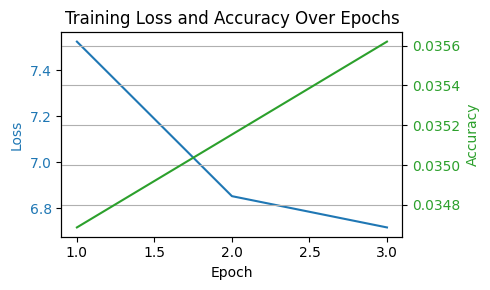

Prediction 1 : بس اتنی سی بات لئے کے ان محمد ڈلیا کہ
Prediction 2 : بس اتنی سی بات کی اور رہا۔ ہاکی کیا ہیں
Prediction 3 : بس اتنی سی بات کے ہمارے ہوں کر کے ضرور
Prediction 4 : بس اتنی سی بات طور کی ناکام ترویج نے اور
Prediction 5 : بس اتنی سی بات سی میں ہے۔ کبھی رات جن


In [8]:
# Model: LSTM
model = Sequential([
    Embedding(total_words, 5),
    LSTM(5),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, batch_size=5, epochs=3)

plot_Graph()
example()

# Save model
# model.save('urdu_textgen_lstm.h5')

## Model: RNN

Epoch 1/5


I0000 00:00:1752036877.774146     463 service.cc:148] XLA service 0x7b943ca7bce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752036877.775559     463 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752036877.775584     463 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 59/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0159 - loss: 8.0966 

I0000 00:00:1752036879.333002     463 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0217 - loss: 7.9209
Epoch 2/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0327 - loss: 6.7993
Epoch 3/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0382 - loss: 6.6707
Epoch 4/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0353 - loss: 6.4441
Epoch 5/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0423 - loss: 6.2137


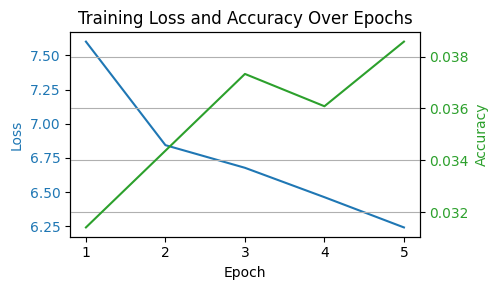

Prediction 1 : بس اتنی سی بات اور ہے کی آلۂ ہے ہے
Prediction 2 : بس اتنی سی بات کا کے دنیا ہے وزیر کہنا
Prediction 3 : بس اتنی سی بات کو میں وہ لندن سی میں
Prediction 4 : بس اتنی سی بات کے ہے کی کر رعایت اور
Prediction 5 : بس اتنی سی بات ہے۔۔۔۔۔۔ پر یہ سامنے پر جبکہ


In [11]:
# Model: RNN Example
model = Sequential([
    Embedding(total_words, 64),
    SimpleRNN(64, return_sequences=False),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, batch_size=64, epochs=5)

plot_Graph()
example()

# Save model
# model.save('urdu_textgen_rnn.h5')

## Model: GRU

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0239 - loss: 8.1267
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0355 - loss: 6.8605
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0354 - loss: 6.7091
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0347 - loss: 6.6032
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0392 - loss: 6.5328
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0308 - loss: 6.5242
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0328 - loss: 6.4951
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0342 - loss: 6.3316
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0466 - loss: 6.1752
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0416 - loss: 6.0605


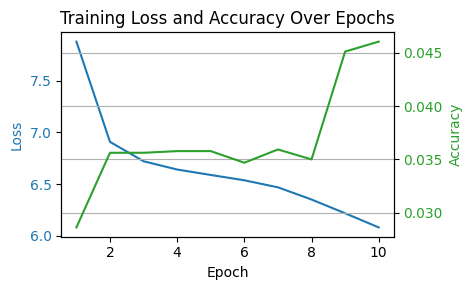

Prediction 1 : بس اتنی سی بات کو ایک سے ملنے ہوں کہ
Prediction 2 : بس اتنی سی بات سے ناسور میں نوجوان'' کے ساتھ
Prediction 3 : بس اتنی سی بات ہے کی مخبری اور وہاں کر
Prediction 4 : بس اتنی سی بات پر وہ گیا پر لت ،
Prediction 5 : بس اتنی سی بات نہ اس میں صرف طور سے


In [12]:
# Model: GRU
model = Sequential([
    Embedding(total_words, 128, input_length=seq_length),
    GRU(128, return_sequences=False),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, batch_size=128, epochs=10)

plot_Graph()
example()

# Save model
# model.save('urdu_textgen_gru.h5')